<a href="https://colab.research.google.com/github/rahulsonarr/profit_prediction/blob/main/profit_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/profit project/50_Startups.csv')
print(df.head())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [ ]:
print(df.shape[0],df.shape[1]) #rows and columns

50 4


In [ ]:
df.info() #datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
df.isnull().sum() #null_check

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [ ]:
print(df.duplicated().sum()) #duplicate values

0


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
corr = df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


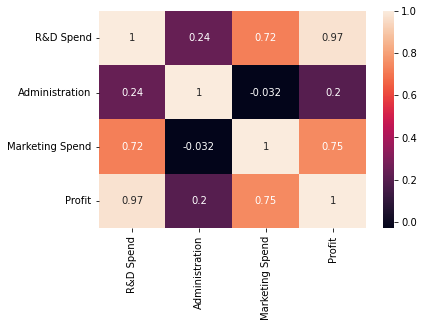

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
x = df['R&D Spend']  #x assign to all column except profit
a = df.drop(['Administration', 'Profit'], axis=1)
b = df.drop(['Profit'], axis=1)

In [ ]:
b.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [ ]:
y = df['Profit'] #y assign to profit

In [ ]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0) #splitdata

In [ ]:
from sklearn.model_selection import train_test_split
a_train,a_test,y_train,y_test=train_test_split(a,y,test_size=0.30,random_state=0) #splitdata

In [ ]:
from sklearn.model_selection import train_test_split
b_train,b_test,y_train,y_test=train_test_split(b,y,test_size=0.30,random_state=0) #splitdata

**Linear Regression**

In [ ]:
x_train_array = np.array(x_train).reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg2 = LinearRegression()
lg3 = LinearRegression()

In [ ]:
lg.fit(x_train_array,y_train) #train model
lg2.fit(a_train,y_train)
lg3.fit(b_train,y_train)

LinearRegression()

In [ ]:
x_test_array = np.array(x_test).reshape(-1,1)

In [ ]:
y_pred = lg.predict(x_test_array)
a_pred = lg2.predict(a_test)
b_pred = lg3.predict(b_test)

In [ ]:
lg.score(x_test_array, y_test)


0.9360398184741837

In [ ]:
lg2.score(a_test, y_test)

0.9431305015271918

In [ ]:
lg3.score(b_test, y_test)

0.9355188337118217

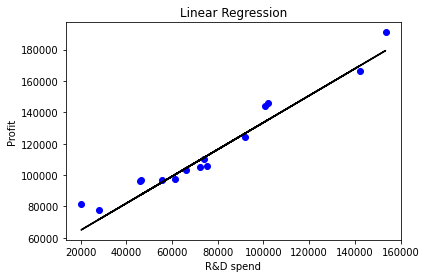

In [ ]:
plt.scatter(x_test_array, y_test, color ='b')
plt.plot(x_test_array, y_pred, color ='k')
plt.title('Linear Regression')
plt.xlabel('R&D spend')
plt.ylabel('Profit')
  
plt.show()
# Data scatter of predicted values

**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
poly2 = PolynomialFeatures(3)
poly3 = PolynomialFeatures(3)
x_poly = poly.fit_transform(x_train_array)
a_poly = poly.fit_transform(a_train)
b_poly = poly.fit_transform(b_train)
  
poly.fit(x_poly, y_train)
poly2.fit(a_poly, y_train)
poly3.fit(b_poly, y_train)

lin = LinearRegression()
lin2 = LinearRegression()
lin3= LinearRegression()

lin.fit(x_poly, y_train)
lin2.fit(a_poly, y_train)
lin3.fit(b_poly, y_train)

lin.score(x_poly, y_train)

0.9567870787375852

In [ ]:
lin2.score(a_poly, y_train)

0.9665465399104555

In [ ]:
lin3.score(b_poly, y_train)

0.9810063183993759

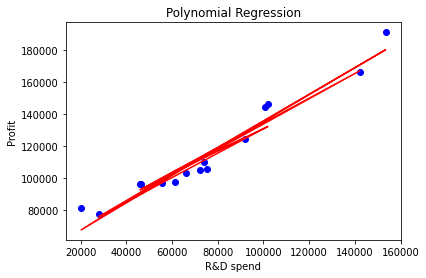

In [ ]:
# Visualising the Polynomial Regression results
plt.scatter(x_test_array, y_test, color = 'blue')
  
plt.plot(x_test_array, lin.predict(poly.fit_transform(x_test_array)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('R&D spend')
plt.ylabel('Profit')
  
plt.show()

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
rf2 = RandomForestRegressor(random_state = 0)
rf3 = RandomForestRegressor(random_state = 0)

In [ ]:
rf.fit(x_train_array,y_train)
rf2.fit(a_train,y_train)
rf3.fit(b_train,y_train) 

RandomForestRegressor(random_state=0)

In [ ]:
rf.score(x_test_array,y_test)

0.9134666379486498

In [ ]:
rf2.score(a_test,y_test)

0.95523971855935

In [ ]:
rf3.score(b_test,y_test)

0.9449569416328961

In [ ]:
r_pred = rf.predict(x_test_array) 

Text(0, 0.5, 'Profit')

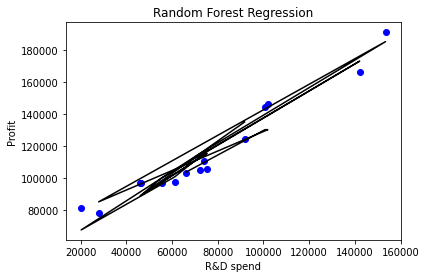

In [ ]:
plt.scatter(x_test_array, y_test, color ='b')
plt.plot(x_test_array, r_pred, color ='k')
plt.title('Random Forest Regression')
plt.xlabel('R&D spend')
plt.ylabel('Profit')
  

**End**